<a href="https://colab.research.google.com/github/ajmalroshan112/Recommendation_system/blob/main/Movie_recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

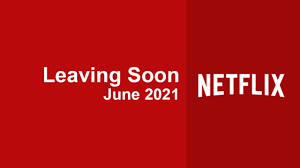

In [105]:
from IPython.display import Image
from IPython.display import display
display(Image(filename='/content/download.png',height=400,width=800))

In [106]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [107]:
df = pd.read_csv('/content/netflix_list.csv')
df

,imdb_id,title,popular_rank,certificate,startYear,endYear,episodes,runtime,type,orign_country,language,plot,summary,rating,numVotes,genres,isAdult,cast,image_url
0,tt4052886,Lucifer,1,15,2016.0,NaN,93.0,42,tvSeries,United States,English,Lucifer Morningstar has decided he's had enoug...,"Lucifer Morningstar, bored from his sulking li...",8.1,250884.0,"Crime,Drama,Fantasy",0,"['Tom Ellis', 'Lauren German', 'Lesley-Ann Bra...",https://m.media-amazon.com/images/M/MV5BNzY1Yj...
1,tt0993840,Army of the Dead,2,18,2021.0,NaN,NaN,148,movie,United States,English,"Following a zombie outbreak in Las Vegas, a gr...","With the abandoned, walled city of Las Vegas o...",5.8,110780.0,"Action,Crime,Horror",0,"['Dave Bautista', 'Ella Purnell', 'Ana de la R...",https://m.media-amazon.com/images/M/MV5BNGY0Nz...
2,tt7255502,The Kominsky Method,3,18,2018.0,2021.0,22.0,30,tvSeries,United States,English,"An aging actor, who long ago enjoyed a brush w...",Michael Douglas plays an actor who made it big...,8.2,28795.0,"Comedy,Drama",0,"['Michael Douglas', 'Sarah Baker', 'Graham Rog...",https://m.media-amazon.com/images/M/MV5BMzA0YT...
3,tt0108778,Friends,4,13+,1994.0,2004.0,235.0,22,tvSeries,United States,English,Follows the personal and professional lives of...,"Ross Geller, Rachel Green, Monica Geller, Joey...",8.9,861843.0,"Comedy,Romance",0,"['Jennifer Aniston', 'Courteney Cox', 'Lisa Ku...",https://m.media-amazon.com/images/M/MV5BNDVkYj...
4,tt9251798,Ragnarok,5,18,2020.0,NaN,12.0,45,tvSeries,Norway,Norwegian,A small Norwegian town experiencing warm winte...,In the small fictional town of Edda coming of ...,7.5,26606.0,"Action,Drama,Fantasy",0,"['David Stakston', 'Jonas Strand Gravli', 'Her...",https://m.media-amazon.com/images/M/MV5BODM3NT...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7003,tt9777386,Merry Happy Whatever,"16,543",13,2019.0,NaN,NaN,28,tvEpisode,United States,English,When his daughter arrives home for the holiday...,When his daughter arrives home for the holiday...,6.1,221.0,Comedy,0,"['Dennis Quaid', 'Bridgit Mendler', 'Brent Mor...",https://m.media-amazon.com/images/M/MV5BOTc0ND...
7004,tt9790434,The Morning Show,"16,569",NaN,2019.0,NaN,NaN,30,tvEpisode,-,-,NaN,-,NaN,NaN,\N,0,"['Bounty Hunters Brothers', 'Bruce Lourie', 'C...",https://m.media-amazon.com/images/G/01/imdb/im...
7005,tt9817600,Losers,"16,599",16,2019.0,NaN,NaN,\N,tvEpisode,-,-,"The life of Michael Bentt, a champion boxer fo...","The life of Michael Bentt, a champion boxer fo...",8.0,221.0,"Documentary,Sport",0,"['Michael Bentt', 'Harold Perrineau', 'Mickey ...",https://m.media-amazon.com/images/M/MV5BOTY3Zj...
7006,tt9842922,Firefly Lane,"16,627",18,2021.0,NaN,NaN,51,tvEpisode,United States,English,Kate experiences the force of nature that is T...,Kate experiences the force of nature that is T...,7.3,380.0,"Drama,Romance",0,"['Katherine Heigl', 'Sarah Chalke', 'Ben Lawso...",https://m.media-amazon.com/images/M/MV5BODM3OW...


In [108]:
df.isna().sum()


imdb_id             0
title               0
popular_rank        0
certificate      4599
startYear         515
endYear          5882
episodes         4704
runtime             2
type                2
orign_country       0
language           13
plot              399
summary             0
rating           1008
numVotes         1008
genres              2
isAdult             0
cast                0
image_url           0
dtype: int64

In [109]:
selected_features=['title','type','language']
selected_features

['title', 'type', 'language']

In [110]:
for feature in selected_features:
  df[feature]=df[feature].fillna(' ')


In [111]:
# df['Year'] = df['Year'].astype(str)
# df['Rating'] = df['Rating'].astype(str)
# df['Subscribers'] = df['Subscribers'].astype(str)

combining_features=df['title']+' '+df['type']+' '+df['language']

In [112]:
vectorizer=TfidfVectorizer()

In [113]:
feature_vectors=vectorizer.fit_transform(combining_features)

In [114]:
print(feature_vectors)

  (0, 2312)	0.17500519878181386
  (0, 7688)	0.2356732891053254
  (0, 4466)	0.9559452291850279
  (1, 5026)	0.16337001353959418
  (1, 1840)	0.5599953523027857
  (1, 7426)	0.23112109958743104
  (1, 5373)	0.33310965753549565
  (1, 453)	0.689775919543514
  (1, 2312)	0.13980564464760814
  (2, 4814)	0.6763727235911784
  (2, 4146)	0.6763727235911784
  (2, 7426)	0.20470050498518735
  (2, 2312)	0.12382377078609823
  (2, 7688)	0.16674907679151868
  (3, 2724)	0.9328892383109647
  (3, 2312)	0.21472158306654704
  (3, 7688)	0.28915793402392426
  (4, 5298)	0.6024668161659563
  (4, 5994)	0.7734117447452953
  (4, 7688)	0.1971497109023854
  (5, 7081)	0.9595301107794406
  (5, 2312)	0.16788740287444984
  (5, 7688)	0.22608800601461973
  (6, 336)	0.6535891651337585
  (6, 3046)	0.7262199083935826
  :	:
  (7001, 3299)	0.5951387651535601
  (7001, 5373)	0.3084261230931989
  (7001, 2312)	0.12944600070807746
  (7002, 7685)	0.2989882472108283
  (7002, 434)	0.8212194093743935
  (7002, 2183)	0.4860089605105743
  (700

In [115]:
# getting similiarity score
from sklearn.metrics.pairwise import cosine_similarity
similarity=cosine_similarity(feature_vectors)

In [116]:
print(similarity)

[[1.         0.02446671 0.06096811 ... 0.         0.02176872 0.02210093]
 [0.02446671 1.         0.06462187 ... 0.         0.01739028 0.01765567]
 [0.06096811 0.06462187 1.         ... 0.         0.01540231 0.01563737]
 ...
 [0.         0.         0.         ... 1.         0.08463003 0.08592156]
 [0.02176872 0.01739028 0.01540231 ... 0.08463003 1.         0.07783789]
 [0.02210093 0.01765567 0.01563737 ... 0.08592156 0.07783789 1.        ]]


In [117]:
# user input movie
movie_name=input('enter your favourite movie :')

enter your favourite movie :Friends


In [118]:
# creating a list with all the movie names given in the dataset
list_of_all_titles=df['title'].tolist()

In [119]:
print(list_of_all_titles)

['Lucifer', 'Army of the Dead', 'The Kominsky Method', 'Friends', 'Ragnarok', 'StartUp', "Grey's Anatomy", 'Sweet Tooth', 'The Blacklist', "Jupiter's Legacy", 'Dirty John', 'The Walking Dead', 'Peaky Blinders', 'Shadow and Bone', 'Breaking Bad', 'The Woman in the Window', 'Bo Burnham: Inside', 'The Mitchells vs the Machines', 'Blue Miracle', 'Love, Death & Robots', 'NCIS: Naval Criminal Investigative Service', 'Trouble', 'Stranger Things', 'Vikings', 'Line of Duty', 'La casa de papel', 'The Flash', 'Outlander', 'Supernatural', 'Master of None', 'Dexter', 'Modern Family', "Schitt's Creek", 'Shingeki no kyojin', 'Halston', 'Brooklyn Nine-Nine', 'Fargo', '365 dni', '101 Dalmatians', '¿Quién Mató a Sara?', 'Better Call Saul', 'New Amsterdam', 'The Crown', 'Castlevania', 'Black Mirror', 'American Horror Story', 'The 100', 'Queen of the South', 'How I Met Your Mother', 'Ozark', 'Cobra Kai', 'The Vampire Diaries', 'The Last Kingdom', "The Queen's Gambit", 'Sons of Anarchy', 'New Girl', 'Pose'

In [120]:
# finding the close match movies
import difflib
find_close_match=difflib.get_close_matches(movie_name,list_of_all_titles)
print(find_close_match)

['Friends', 'Line Friends', 'Lego Friends']


In [121]:
from os import close
close_match=find_close_match[0]
print(close_match)

Friends


In [122]:
from operator import index
# find the index of the movie with title
index_of_the_movie = df[df.title==close_match].index[0]
print(index_of_the_movie)

3


In [123]:
# getting a list of similar movies
similarity_score = list(enumerate(similarity[index_of_the_movie]))
similarity_score

[(0, 0.10572419470962573),
 (1, 0.03001928934037355),
 (2, 0.0748044546298925),
 (3, 1.0000000000000002),
 (4, 0.0570074030979477),
 (5, 0.10142418964890904),
 (6, 0.07676284974099665),
 (7, 0.08157262268302586),
 (8, 0.09772989408008317),
 (9, 0.07935783271441717),
 (10, 0.08886214869591469),
 (11, 0.08586597633232834),
 (12, 0.04574261153260277),
 (13, 0.07629702063957969),
 (14, 0.09178744481370393),
 (15, 0.02415244029194122),
 (16, 0.02389667846549234),
 (17, 0.02171076136377631),
 (18, 0.03147402770161947),
 (19, 0.07738616326829575),
 (20, 0.050070027052265834),
 (21, 0.03902432366219689),
 (22, 0.08849374120421347),
 (23, 0.06410778075751848),
 (24, 0.07765277967797443),
 (25, 0.04399508204384822),
 (26, 0.10444519428449947),
 (27, 0.10142418964890904),
 (28, 0.10142418964890904),
 (29, 0.07803883769844529),
 (30, 0.10572419470962573),
 (31, 0.08768745894335131),
 (32, 0.07587893071161278),
 (33, 0.04348126369361928),
 (34, 0.035135816254783105),
 (35, 0.05127900138022444),
 (3

In [124]:
print(len(similarity_score))

7008


In [125]:
# sorting the movies based on their similarity score
sorted_similar_movies=sorted(similarity_score,key=lambda x:x[1],reverse=True)
sorted_similar_movies

[(3, 1.0000000000000002),
 (4500, 0.7223570887804861),
 (5981, 0.7030098232427054),
 (6744, 0.6455385266044983),
 (828, 0.5941493876092111),
 (4871, 0.5733566334600876),
 (6796, 0.5352232951188126),
 (2010, 0.5074076030674738),
 (2913, 0.47973168370528524),
 (2908, 0.4323726594806834),
 (5347, 0.42686246184592064),
 (3357, 0.4250006500981199),
 (5876, 0.4224580759933747),
 (6824, 0.41700462020935136),
 (3373, 0.41133151618034114),
 (1002, 0.4066265769211486),
 (4643, 0.3988759756861534),
 (5209, 0.36016339214804743),
 (115, 0.1560683213774448),
 (404, 0.1560683213774448),
 (580, 0.1408383995351152),
 (2457, 0.14027181211563247),
 (1084, 0.13960892820951576),
 (5739, 0.13819580412457094),
 (4566, 0.13382942308603507),
 (530, 0.13354544380848282),
 (271, 0.13226161831201066),
 (2475, 0.12796252608191747),
 (412, 0.12575938035949097),
 (292, 0.12079982341609888),
 (747, 0.12079982341609888),
 (2703, 0.12079982341609888),
 (3807, 0.12053224877121295),
 (921, 0.11932132711145374),
 (983, 0.

In [126]:
print('movies suggested for you : \n')
i=1
for movie in sorted_similar_movies:
  index=movie[0]
  title_from_index = df[df.index==index]['title'].values[0]
  if (i<=10):
    print(i,'.',title_from_index)
    i=i+1

movies suggested for you : 

1 . Friends
2 . Lego Friends
3 . Line Friends
4 .  Lego Friends
5 . Friends from College
6 . DC Super Friends
7 .  Friends from College
8 . Talking Tom and Friends
9 . LEGO Friends: Girls on a Mission
10 . Thomas & Friends: All Engines Go!
